In [10]:
# Load Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import json

In [11]:
# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries loaded")

Libraries loaded


In [12]:
# Loading collected data

df = pd.read_csv('../data/raw/sec_filings.csv')

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Show first few rows
df.head()

Dataset shape: (28, 11)
Columns: ['company_name', 'ticker', 'form_type', 'filed_date', 'filing_url', 'full_content', 'content_length', 'risk_factors', 'business_overview', 'md_and_a', 'controls']


,company_name,ticker,form_type,filed_date,filing_url,full_content,content_length,risk_factors,business_overview,md_and_a,controls
0,Apple Inc.,AAPL,10-K,0000320193-24-000123,https://www.sec.gov/Archives/edgar/data/320193...,<?xml version='1.0' encoding='ASCII'?>\n<!--XB...,1503780,"Item 1A.</a></span></div></td><td colspan=""3"" ...","Item 1.</a></span></div></td><td colspan=""3"" s...","Item 7.</a></span></div></td><td colspan=""3"" s...","Item 9A.</a></span></div></td><td colspan=""3"" ..."
1,Apple Inc.,AAPL,10-K,0000320193-23-000106,https://www.sec.gov/Archives/edgar/data/320193...,"<?xml version=""1.0"" ?><!--XBRL Document Create...",1558924,"Item 1A.</a></span></div></td><td colspan=""3"" ...","Item 1.</a></span></div></td><td colspan=""3"" s...","Item 7.</a></span></div></td><td colspan=""3"" s...","Item 9A.</a></span></div></td><td colspan=""3"" ..."
2,Apple Inc.,AAPL,10-K,0000320193-22-000108,https://www.sec.gov/Archives/edgar/data/320193...,"<?xml version=""1.0"" ?><!--XBRL Document Create...",2049857,"Item 1A.</a></span></div></td><td colspan=""3"" ...","Item 1.</a></span></div></td><td colspan=""3"" s...","Item 7.</a></span></div></td><td colspan=""3"" s...","Item 9A.</a></span></div></td><td colspan=""3"" ..."
3,Apple Inc.,AAPL,10-Q,0000320193-25-000073,https://www.sec.gov/Archives/edgar/data/320193...,<?xml version='1.0' encoding='ASCII'?>\n<!--XB...,888048,"Item 1A.</a></span></div></td><td colspan=""3"" ...","Item 1.</a></span></div></td><td colspan=""3"" s...","Item 7A, &#8220;Quantitative and Qualitative D...",Controls and Procedures</a></span></div></td><...
4,Apple Inc.,AAPL,10-Q,0000320193-25-000057,https://www.sec.gov/Archives/edgar/data/320193...,<?xml version='1.0' encoding='ASCII'?>\n<!--XB...,889977,"Item 1A.</a></span></div></td><td colspan=""3"" ...","Item 1.</a></span></div></td><td colspan=""3"" s...","Item 7A, &#8220;Quantitative and Qualitative D...",Controls and Procedures</a></span></div></td><...


In [13]:
# Basic Statistics
print("Dataset Overview")
print(f"\nTotal documents: {len(df)}")
print(f"\nCompanies represented:")
print(df['company_name'].value_counts())
print(f"\nForm types:")
print(df['form_type'].value_counts())
print(f"\nDate range:")
print(f"Earliest: {df['filed_date'].min()}")
print(f"Latest: {df['filed_date'].max()}")

Dataset Overview

Total documents: 28

Companies represented:
company_name
Apple Inc.        6
MICROSOFT CORP    6
AMAZON COM INC    6
Tesla, Inc.       6
Alphabet Inc.     4
Name: count, dtype: int64

Form types:
form_type
10-Q      15
10-K      12
10-K/A     1
Name: count, dtype: int64

Date range:
Earliest: 0000320193-22-000108
Latest: 0001652044-21-000057


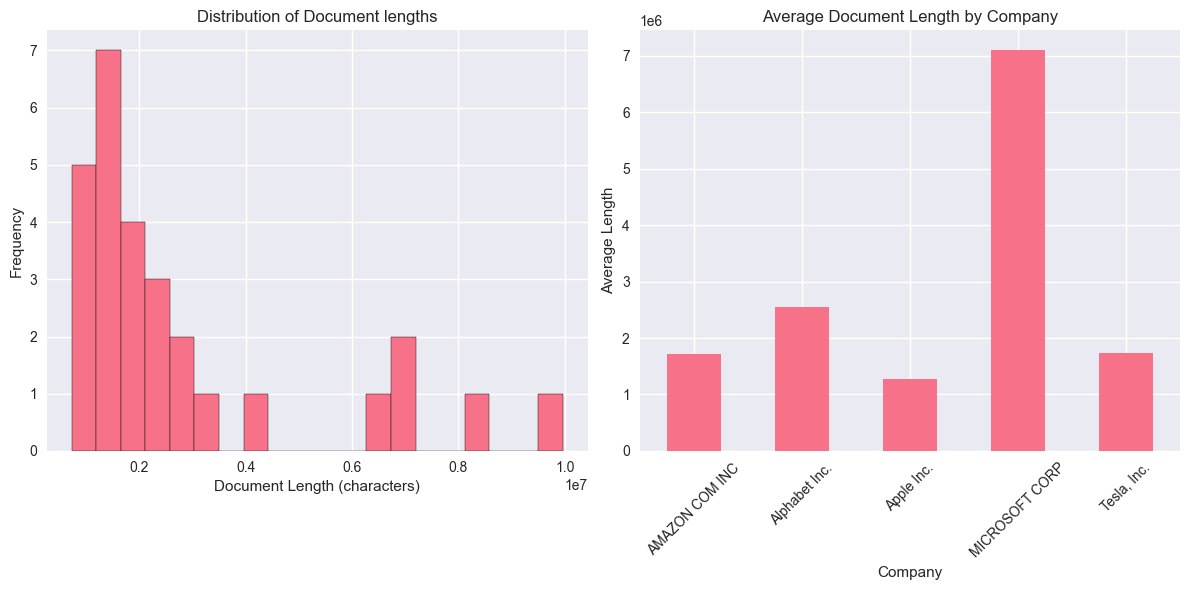


 Average document length: 2,895,088 characters
Shortest: 732,589
Longest: 9,963,591


In [16]:
# Visualize document lengths
plt.figure(figsize=(12,6))

# Plot 1: Distribution of content lengths
plt.subplot(1,2,1)
df['content_length'].hist(bins=20, edgecolor='black')
plt.xlabel('Document Length (characters)')
plt.ylabel('Frequency')
plt.title('Distribution of Document lengths')

#Plot 2: By company
plt.subplot(1,2,2)
df.groupby('company_name')['content_length'].mean().plot(kind='bar')
plt.xlabel('Company')
plt.ylabel('Average Length')
plt.title('Average Document Length by Company')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


print(f"\n Average document length: {df['content_length'].mean():,.0f} characters")
print(f"Shortest: {df['content_length'].min():,.0f}")
print(f"Longest: {df['content_length'].max():,.0f}")


In [17]:
# Examine a sample document
print("Sample Document Content:\n")
print("="*60)

# Get first document
sample = df.iloc[0]

print(f"Company: {sample['company_name']}")
print(f"Form Type: {sample['form_type']}")
print(f"Filed: {sample['filed_date']}")
print(f"Length: {sample['content_length']:,} characters")
print("\n" + "="*60)
print("\nFirst 500 characters:\n")

# Show beginning of content
if pd.notna(sample.get('risk_factors')):
    print(sample['risk_factors'][:500])
else:
    print("Risk factors section ot available")

print("\n...")

Sample Document Content:

Company: Apple Inc.
Form Type: 10-K
Filed: 0000320193-24-000123
Length: 1,503,780 characters


First 500 characters:

Item 1A.</a></span></div></td><td colspan="3" style="background-color:#ffffff;padding:2px 1pt;text-align:left;vertical-align:bottom"><div style="padding-left:9pt;text-indent:-9pt"><span style="color:#0000ff;font-family:'Helvetica',sans-serif;font-size:9pt;font-weight:400;line-height:100%;text-decoration:underline"><a style="color:#0000ff;font-family:'Helvetica',sans-serif;font-size:9pt;font-weight:400;line-height:100%;text-decoration:underline" href="#i7bfbfbe54b9647b1b4ba4ff4e0aba09d_52">Risk F

...


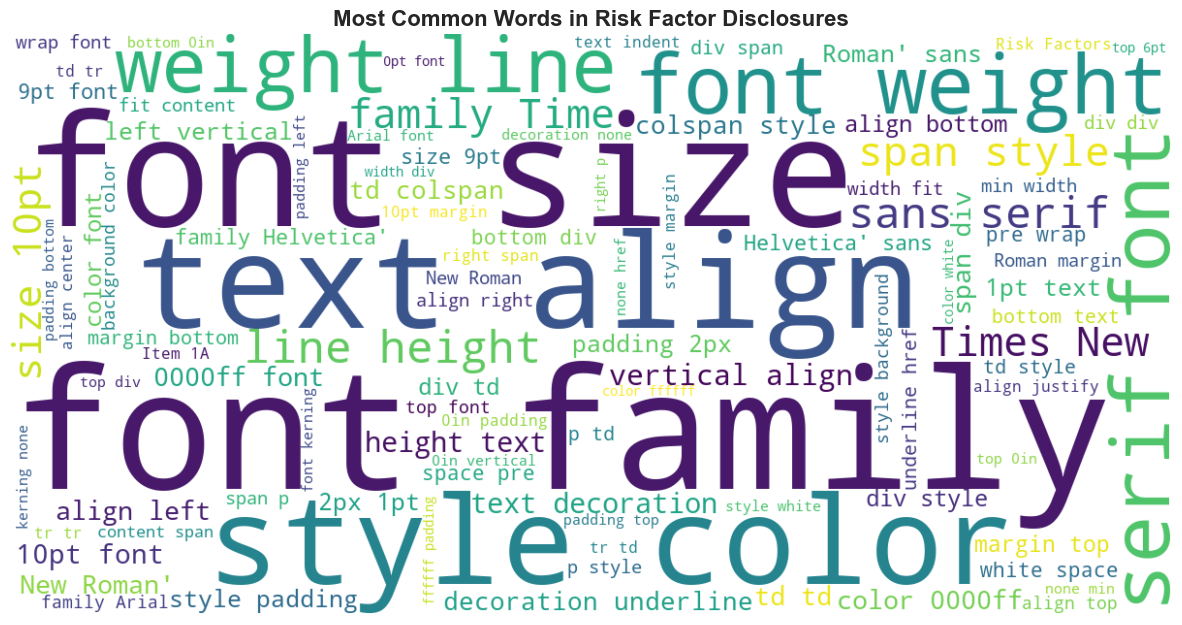


 Insight: Common words reveal typical risk themes!
Look for: business, risk, financial, operations, market, etc.


In [18]:
# Create word cloud from risk factors
# This visualizes the most common words

# Combine all risk factor sections
all_risk_text = ' '.join(
    df['risk_factors'].dropna().astype(str).tolist()
)

# Create word cloud
wordcloud = WordCloud(
    width = 1200,
    height = 600,
    background_color = 'white',
    max_words = 100
).generate(all_risk_text)

# Display
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Risk Factor Disclosures',
            fontsize=16, fontweight='bold')
plt.show()

print("\n Insight: Common words reveal typical risk themes!")
print("Look for: business, risk, financial, operations, market, etc.")

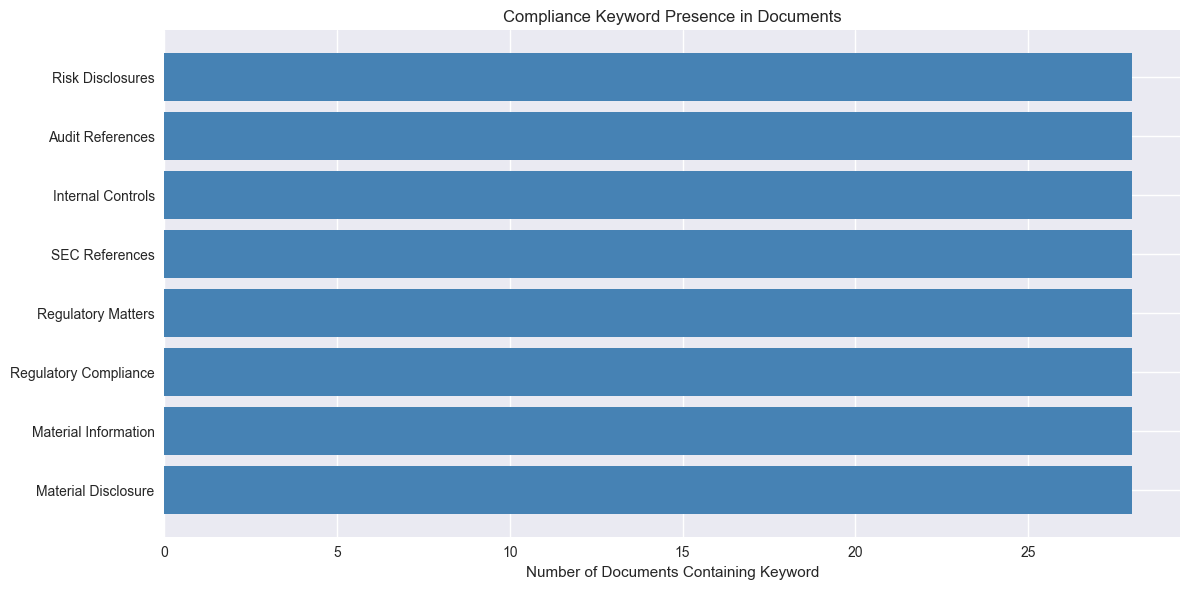


Keyword Analysis:
Material Disclosure: 28 documents (100.0%)
Material Information: 28 documents (100.0%)
Regulatory Compliance: 28 documents (100.0%)
Regulatory Matters: 28 documents (100.0%)
SEC References: 28 documents (100.0%)
Internal Controls: 28 documents (100.0%)
Audit References: 28 documents (100.0%)
Risk Disclosures: 28 documents (100.0%)


In [19]:
# Check for compliance keywords

compliance_keywords = {
    'disclosure': 'Material Disclosure',
    'material': 'Material Information',
    'compliance': 'Regulatory Compliance',
    'regulation': 'Regulatory Matters',
    'sec': 'SEC References',
    'internal control': 'Internal Controls',
    'audit': 'Audit References',
    'risk': 'Risk Disclosures'
}

# Count keywords in documents
keyword_counts = {}

for keyword, category in compliance_keywords.items():
    count = df['full_content'].str.contains(
        keyword, 
        case=False, 
        na=False
    ).sum()
    keyword_counts[category] = count

# Visualize
plt.figure(figsize=(12, 6))
categories = list(keyword_counts.keys())
counts = list(keyword_counts.values())

plt.barh(categories, counts, color='steelblue')
plt.xlabel('Number of Documents Containing Keyword')
plt.title('Compliance Keyword Presence in Documents')
plt.tight_layout()
plt.show()

print("\nKeyword Analysis:")
for category, count in keyword_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{category}: {count} documents ({percentage:.1f}%)")